# Archivo EDA de autos electrivos vs autos de gasolina
En este archivo, vamos a realizar ciertos análisis con respecto a los autos electricos y de consumo de gasolina, se harán comparaciones con respecto a su consumo de energía y las emisiones de CO2 que provocan

In [91]:
# Comenzamos cargando las librerías necesarias para nuestro análisis
import pandas as pd # Librería para trabajar con dataframes
import numpy as np # Librería para usos estadísticos
import seaborn as sns # Librería para crear gráficos elaborados
import matplotlib.pyplot as plt # Librería para crear gráficos sencillos
import folium # Libería para la creación de mapas interactivos

In [15]:
# Se procede a leer el archivo de autos general
df_Autos = pd.read_csv('..\DataSets\Autos2023.csv', encoding="latin1")

# Emisiones de CO2 por marca
En esta gráfica, vamos a mostrar el promedio de las emisiones de CO2 que generan los automóviles de cada una de las marcas, esta medición se realizan bajo el estandar de gramos de emisión sobre kilometro recorrido.

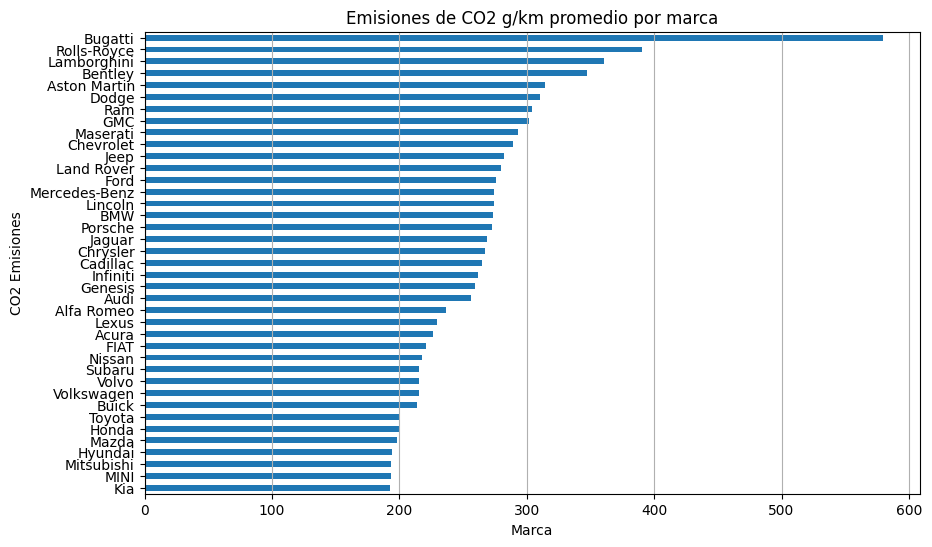

In [36]:
# Filtramos un nuevo dataframe de emisiones que solo considere los autos que sean de Gasolina
df_EmisionesCo2 = df_Autos[df_Autos["Type_Car"] == "Gasoline"]
# Realizamos una agrupación por marca y calculamos el promedio de emisiones de CO2
df_EmisionesCo2 = df_EmisionesCo2.groupby(['Make'])['CO2 emissions (g/km)'].mean()
# Ordenamos el resultado de obtenido
df_EmisionesCo2 = df_EmisionesCo2.sort_values(ascending=True)

# Graficar los datos
ax = df_EmisionesCo2.plot(kind='barh', figsize=(10, 6))
ax.set_ylabel('CO2 Emisiones')
ax.set_xlabel('Marca')
ax.set_title('Emisiones de CO2 g/km promedio por marca')
plt.grid(axis='x')

# Mostrar la gráfica
plt.show()


Haciendo un análisis más profundo de la información presentada, y extrapolando los datos de tal forma que nos permita darnos una idea del daño ambiental que generan los autómoviles de gasolina, vamos a partir del supuesto de que en una jornada de trabajo, un taxi recorre en promedio XYZ kilómetros al día, obteniendo un promedio de la emisión de CO2 de aquellas marcas de autos que son utilizadas como taxis en la ciudad, nos da un resultado de ABC g/km.

Con esta información, podríamos calcular que con XYZ kilómetros que recorre un taxi al día, multiplicado por ABC g/km, se estarían generando JKL g/km al día de CO2.

Apoyando la tendencia global sobre el uso de los autos eléctricos por encima de los autos que usan gasolina, podríamos decir que en promedio un solo taxi eléctrico que trabaja 5 días a la semana por 52 semanas al año, podría ahorrar JKL g de CO2.

Lo anterior soportado por la siguiente fórmula:
XYZ kilometros xDía * ABC g/km * 5 días * 52 semanas * / 1000 = toneladas de CO2 emitidos


# Ahorro de combustible
En esta gráfica, vamos a mostrar el ahorro de combustible que se puede tener al utilizar autos eléctricos en vez de autos que usen gasolina

C:\Users\Windows10\AppData\Local\Temp\ipykernel_11152\365877846.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, Consumo_Auto_Electrico[i] + 0.2, f'{valor:.2f}%', ha='center', va='bottom', color='black')


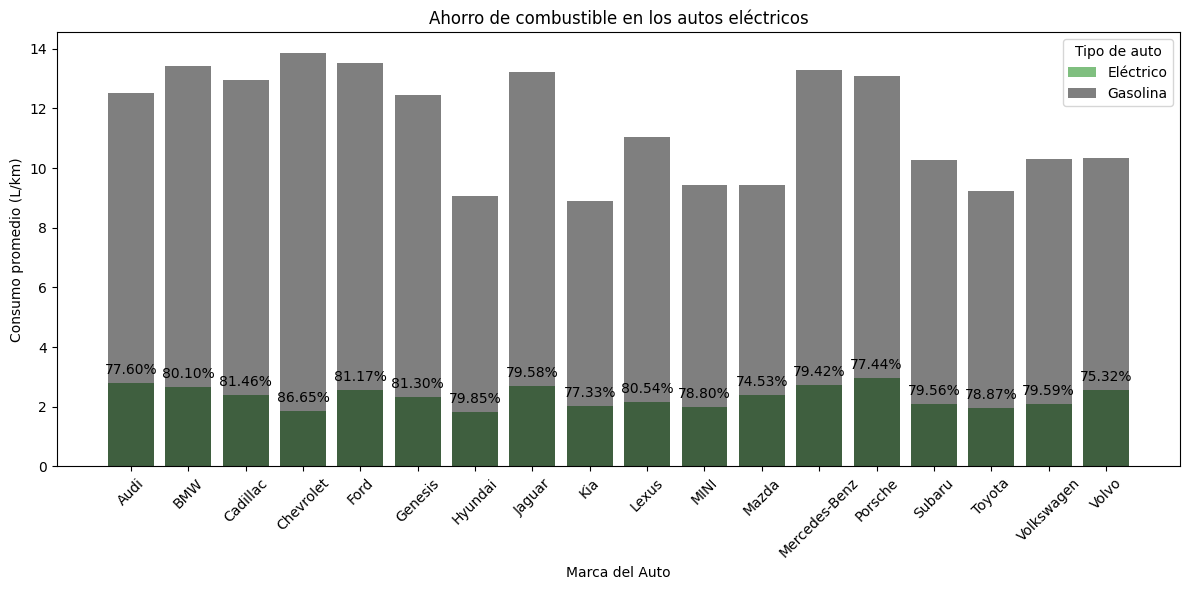

In [46]:
# Creamos un nuevo DF para obtener solo los autos eléctricos
df_electricos = df_Autos[df_Autos['Type_Car'] == 'Electric']
# Creamos un nuevo DF para obtener solo los autos de gasolina
df_gasolina = df_Autos[df_Autos['Type_Car'] == 'Gasoline']
# Utilizando una intersección, filtramos únicamente las marcas que tienen autos de ambos tipos
marcas_con_ambos_tipos = set(df_electricos['Make']).intersection(set(df_gasolina['Make']))
# Se filtra el DataFrame original para incluir solo las marcas que tienen ambos tipos de autos
df_filtrado = df_Autos[df_Autos['Make'].isin(marcas_con_ambos_tipos)]

# Calcular el consumo promedio de litros por kilómetro para cada tipo de auto y marca en el DataFrame filtrado
Consumo_Auto_Electrico = df_filtrado[df_filtrado['Type_Car'] == 'Electric'].groupby(['Make'])['City (L/100 km)'].mean()
Consumo_Auto_Gasolina = df_filtrado[df_filtrado['Type_Car'] == 'Gasoline'].groupby(['Make'])['City (L/100 km)'].mean()

# Calcular el porcentaje de ahorro entre el consumo promedio de autos eléctricos y de gasolina
porcentaje_ahorro = ((Consumo_Auto_Gasolina - Consumo_Auto_Electrico) / Consumo_Auto_Gasolina) * 100

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
# Barra para autos eléctricos
plt.bar(Consumo_Auto_Electrico.index, Consumo_Auto_Electrico, color='green', alpha=0.5, label='Eléctrico')
# Barra para autos de gasolina
plt.bar(Consumo_Auto_Gasolina.index, Consumo_Auto_Gasolina, color='black', alpha=0.5, label='Gasolina')

# Agregar porcentaje de ahorro como etiqueta en cada barra
for i, valor in enumerate(porcentaje_ahorro):
    plt.text(i, Consumo_Auto_Electrico[i] + 0.2, f'{valor:.2f}%', ha='center', va='bottom', color='black')

# Agregar etiquetas y título
plt.xlabel('Marca del Auto')
plt.ylabel('Consumo promedio (L/km)')
plt.title('Ahorro de combustible en los autos eléctricos')
plt.xticks(rotation=45)
plt.legend(title='Tipo de auto')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

De acuerdo a los datos proporcionados, se tiene que en promedio un litro de gasolina, sería equivalente a la energía de 8.9kWh, este dato fue utilizado para calcular un estimado de cuántos litros por kilómetro consumiría un auto eléctrico, de esta forma, es como podemos gráficar la cantidad de litros por cada 100km que consume un auto de gasolina, en contra de lo que se estima consumiría un auto eléctrico.

Volviendo a los datos de la primer gráfica, tenemos que en promedio un taxi recorre XYZ kilómetros por día, lo que significa que gasta ABC litros de gasolina en dicho día, suponiendo un precio promedio de 1usd por litro de gasolina, el auto estaría gastando de forma diaria JKLusd de gasolina. 

En promedio, este costo se podría reducir en un 79.39% 


# Estaciones de carga
En este archivo, vamos a analizar las estaciones de carga existentes en la ciudad de nueva york

In [48]:
# Se procede a leer el archivo de autos general
df_Estaciones = pd.read_csv('..\DataSets\Estaciones_Carga_NY.csv', encoding="utf-8")

In [54]:
# Sustituimos los datos vacios o nulos por el "No Data", con la intención de representar que se desconoce el precio de la estación
df_Estaciones["EV Price"].fillna("No Data", inplace=True)

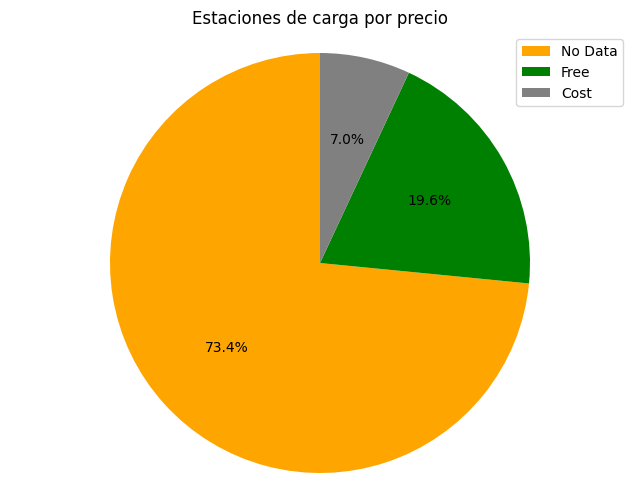

In [79]:
# Realizamos el conteo de las estaciones de carga según su precio
ConteoPorPrecio = df_Estaciones["EV Price"].value_counts()

# Graficamos los datos como un gráfico de pastel
plt.figure(figsize=(8,6))
pastel = ConteoPorPrecio.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=None, colors=["Orange", "Green", "Gray"])
plt.axis('equal')  # Ajustar el aspecto para que sea un círculo
plt.title('Estaciones de carga por precio')
plt.ylabel('')
plt.legend(ConteoPorPrecio.index, loc="upper right")

# Mostrar la gráfica
plt.show()

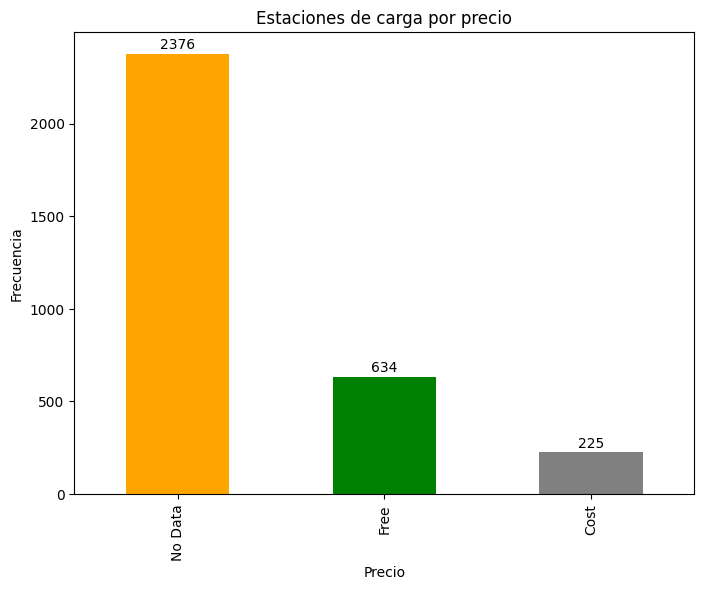

In [80]:
# Realizamos el conteo de las estaciones de carga según su precio
ConteoPorPrecio = df_Estaciones["EV Price"].value_counts()

# Graficamos los datos como un gráfico de barras
plt.figure(figsize=(8,6))
ConteoPorPrecio.plot(kind='bar', color=["Orange", "Green", "Gray"])
plt.title('Estaciones de carga por precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Agregar etiquetas en las barras
for i, valor in enumerate(ConteoPorPrecio):
    plt.text(i, valor + 10, str(valor), ha='center', va='bottom')

# Mostrar la gráfica
plt.show()

Analizaremos las dos gráficas anteriores desde lo general a lo particular, terminando con una conclusión que supone ciertos datos según los ya mostrados.

Existen un total de 3,235 estaciones de carga electrica en el estado de Nueva York, de las cuales hay un 73.4% del que desconocemos su precio, es por esta razón que vamos a especular cuál puede ser su precio utilizando los valores conocidos.

Para ello, tomamos en proporción el 7% de estaciones que tienen costo y el 19.6% que es gratis, con ello, si ponemos un escenario donde la suma de estos dos valores hicieran un 100% tendríamos un escenario de:

634 Estaciones gratis + 225 Estaciones con costo = 859 Estaciones = 100% 
Sacando la equivalencia de cada porción tenemos qué:
634 * 100% / 859 = 73.81% de estaciones gratuitas
225 * 100/ / 859 = 26.19% de estaciones con costo

Con la proporción anterior, podemos especular el total de estaciones gratuitas y de costo de los valores desconocidos de acuerdo al siguiente cálculo:

2,376 Estaciones de carga sin datos de costo
2,376 Estaciones * 73.81% = 1,754 gratuitas
2,376 Estaciones * 26.19% = 622 con costo

Con estos resultados creamos una nueva gráfica con solo dos valores: "Free" y "Cost"

Donde: 
Free = 634 Estaciones originales + 1,754 Estaciones Especuladas = 2,388
Cost = 225 Estaciones originales + 622 Estaciones especuladas = 847

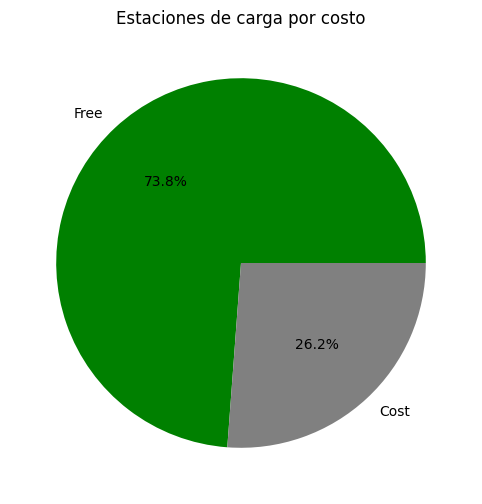

In [90]:
# Definimos los valores y frecuencias
Valores = ['Free', 'Cost']
Frecuencias = [2388, 847]

# Graficar el pastel
plt.figure(figsize=(8, 6))
plt.pie(Frecuencias, labels=Valores, autopct='%1.1f%%', colors=['Green', 'Gray'])
plt.title('Estaciones de carga por costo')

# Mostrar la gráfica
plt.show()

De acuerdo a la gráfica anterior, podríamos especular que la tendencia de las estaciones de carga para autos elétricos, propone que en un 73.8% serían gratuitas, ayudando a reducir los costos de traslado.

# Distribución de las estaciones de carga
Vamos a realizar un análisis que nos muestre la distribución geográfica de las estaciones de carga en el Estado de Nueva York

In [95]:
# Crear un mapa centrado en Nueva York
mapa = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Leer los datos de las ubicaciones de las estaciones de carga eléctrica desde un DataFrame de Pandas
# Supongamos que tienes un DataFrame llamado df con las columnas 'Latitud' y 'Longitud'
# Reemplaza df con el nombre real de tu DataFrame
for index, row in df_Estaciones.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Station Name']).add_to(mapa)

# Mostrar el mapa
mapa

En el mapa anterior, mostramos la distribución geográfica de las estaciones de carga electricas existentes en el estado de Nueva York.

Partiendo de que la superficie del estado es de 830km2, haremos un cálculo para estimar la distancia que peude existir para podr llegar a una estación de carga desde un punto o la distancia entre una estación de carga y otra.

Dentro del estado, hay un total de 3,235 estaciones de carga eléctrica, tomando en consideración los 830km2 de extensión de terreno que tiene Nueva York, podemos deducir que en promedio 830km2 / 3,235 estaciones, tendríamos que por cada 0.257km2 por estación.

Esto nos da como resultado que, en un área de tan solo 257m2, el aproximado a 3 cuadras, existe una estación de carga, es decir; que en promedio para llegar desde cualquier punto a una estación de carga, se tendría que recorrer de 3 a 5 cuadras de distancia, algo que consideramos es una tramo corto, ayudando a que en casos de emergencia por baja batería del vehículo, no resulte imposible el poder cargarlo en un punto cercano.

Adicional a la cercania, si tomamos en cuenta que de acuerdo a nuestra especulación, casi el 74% de las estaciones de carga eléctrica existentes son gratuitas, es más probable que al momento de querer realizar la carga del vehículo, lo podamos hacer en una estación que no tenga costo, de igual forma, en caso de llegar a alguna estación que tenga costo, este último se puede evitar la hacer un corto desplazamiento hacia una estación diferente.